In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [3]:
df = pd.read_csv('Loan_Data.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Fill Missing Values

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
cols_w_nan = ['Gender','Married','Dependents','Self_Employed','Credit_History']

for i in cols_w_nan:
    df[i] = df[i].fillna('not_specified')

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df.drop('Loan_ID', axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             578 non-null    object 
 1   Married            578 non-null    object 
 2   Dependents         578 non-null    object 
 3   Education          578 non-null    object 
 4   Self_Employed      578 non-null    object 
 5   ApplicantIncome    578 non-null    int64  
 6   CoapplicantIncome  578 non-null    float64
 7   LoanAmount         578 non-null    float64
 8   Loan_Amount_Term   578 non-null    float64
 9   Credit_History     578 non-null    object 
 10  Property_Area      578 non-null    object 
 11  Loan_Status        578 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 58.7+ KB


## Distributions

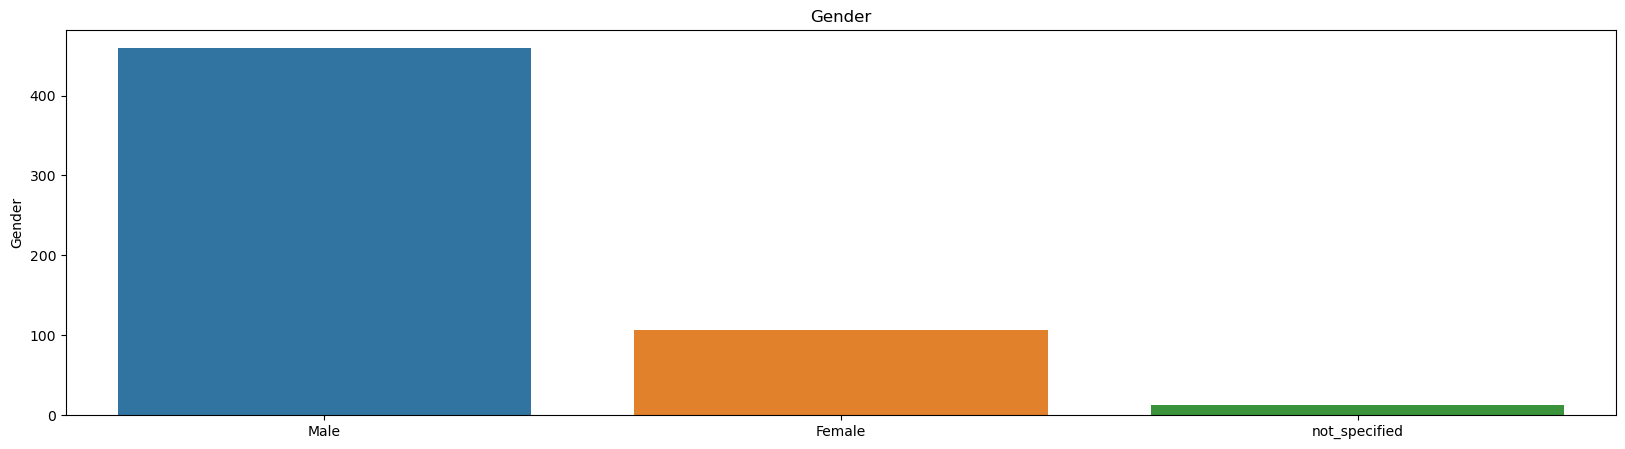

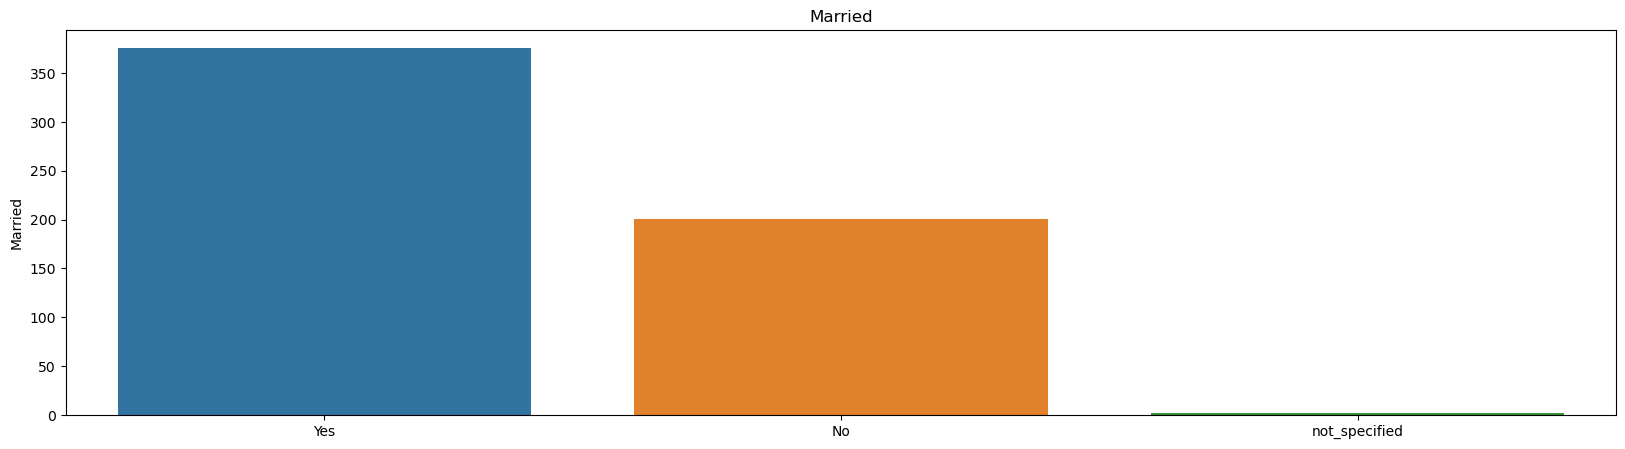

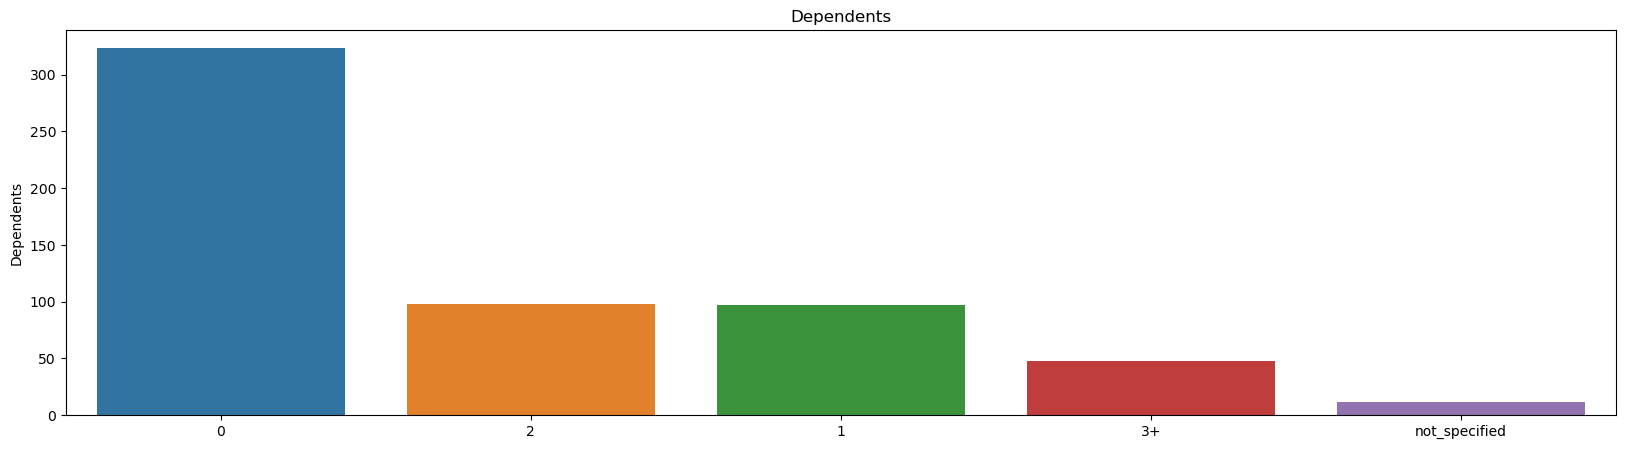

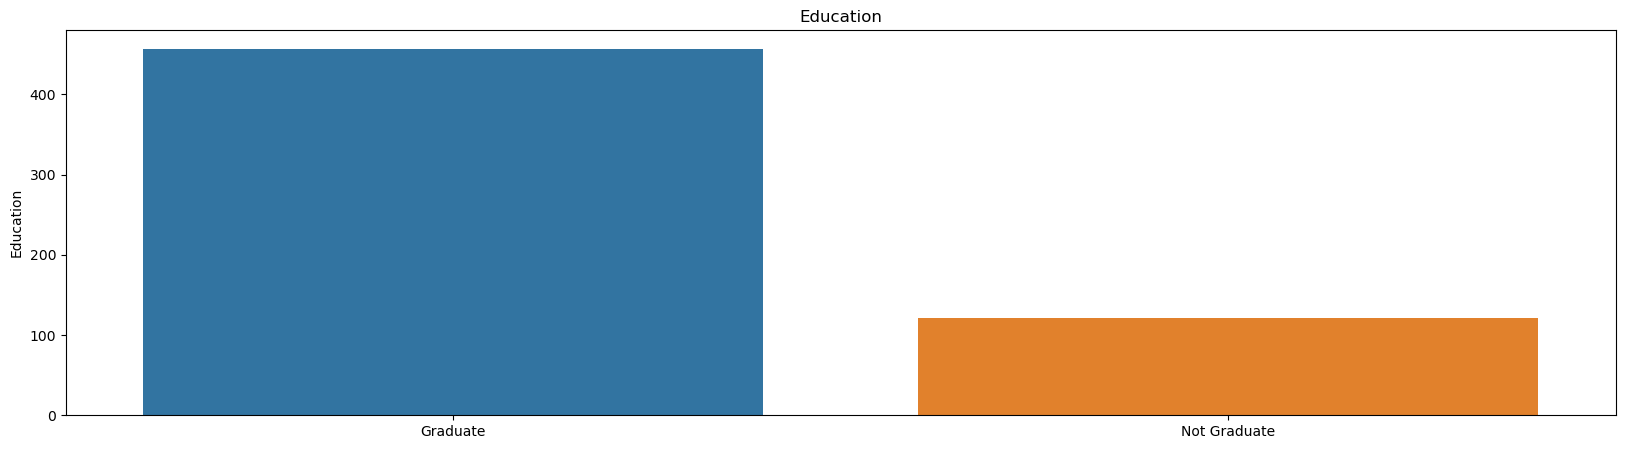

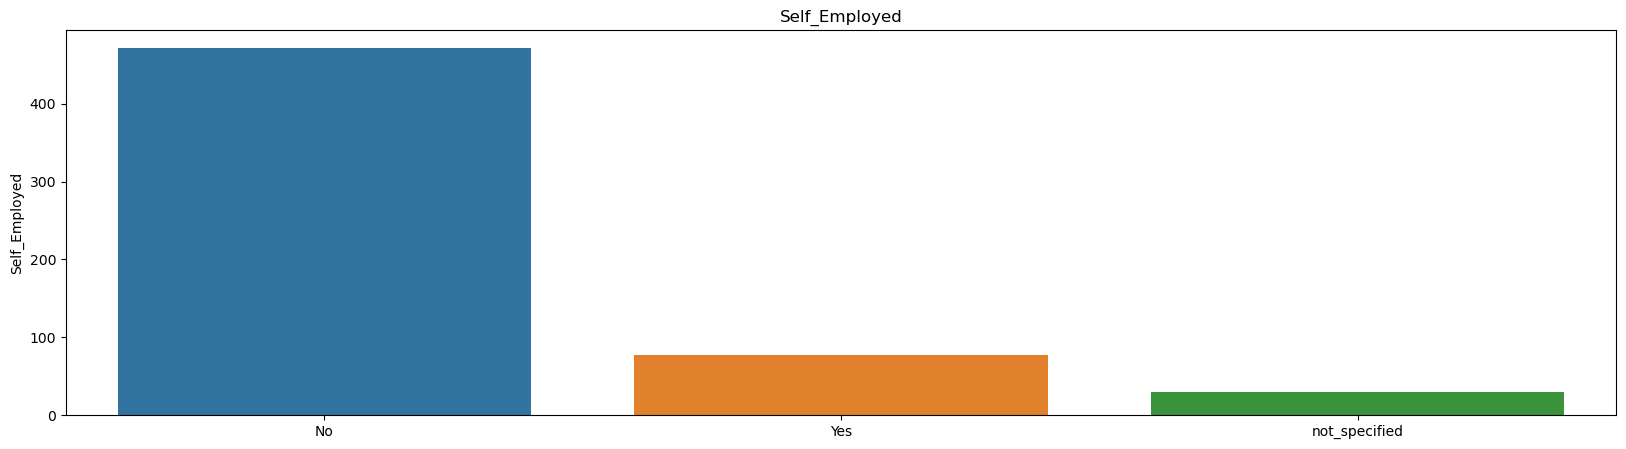

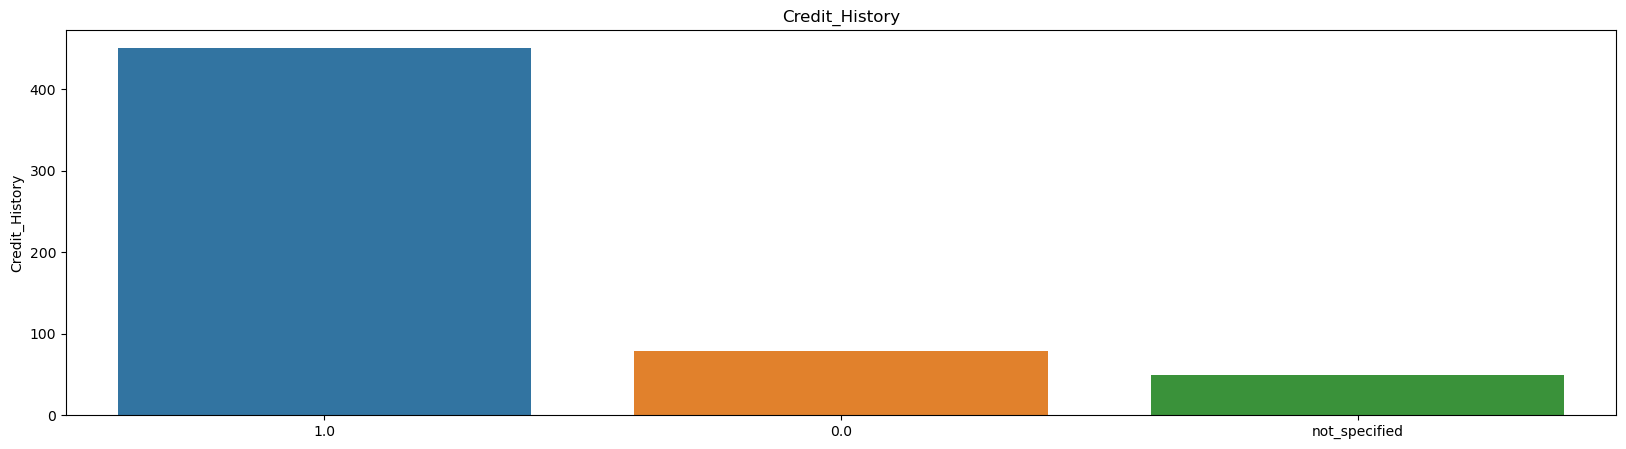

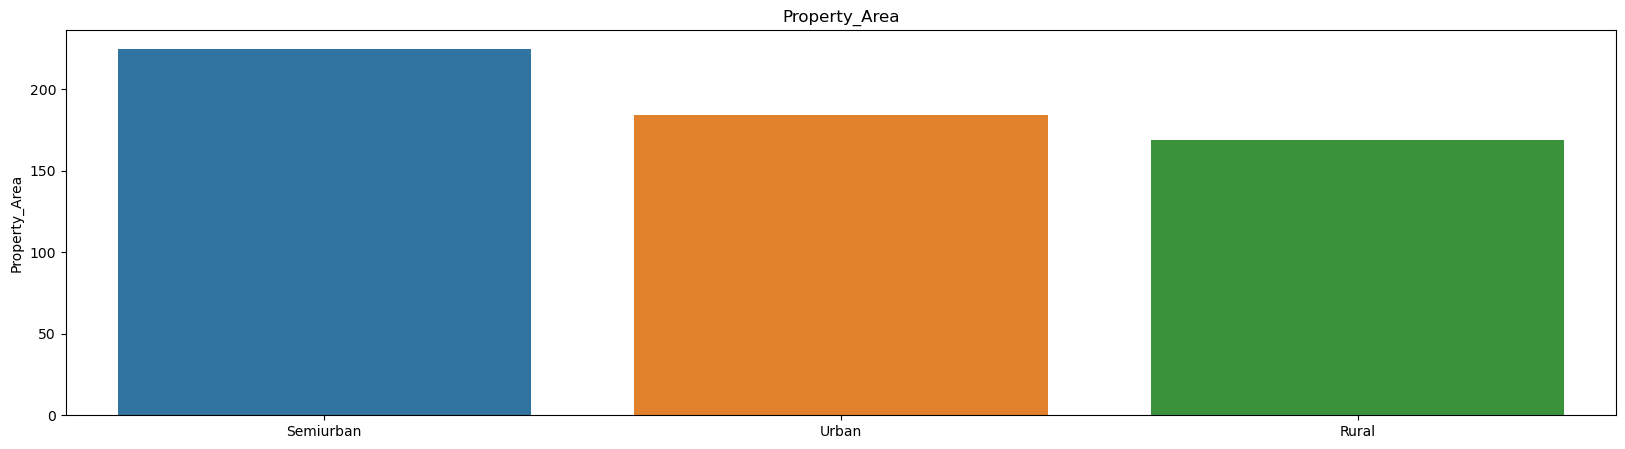

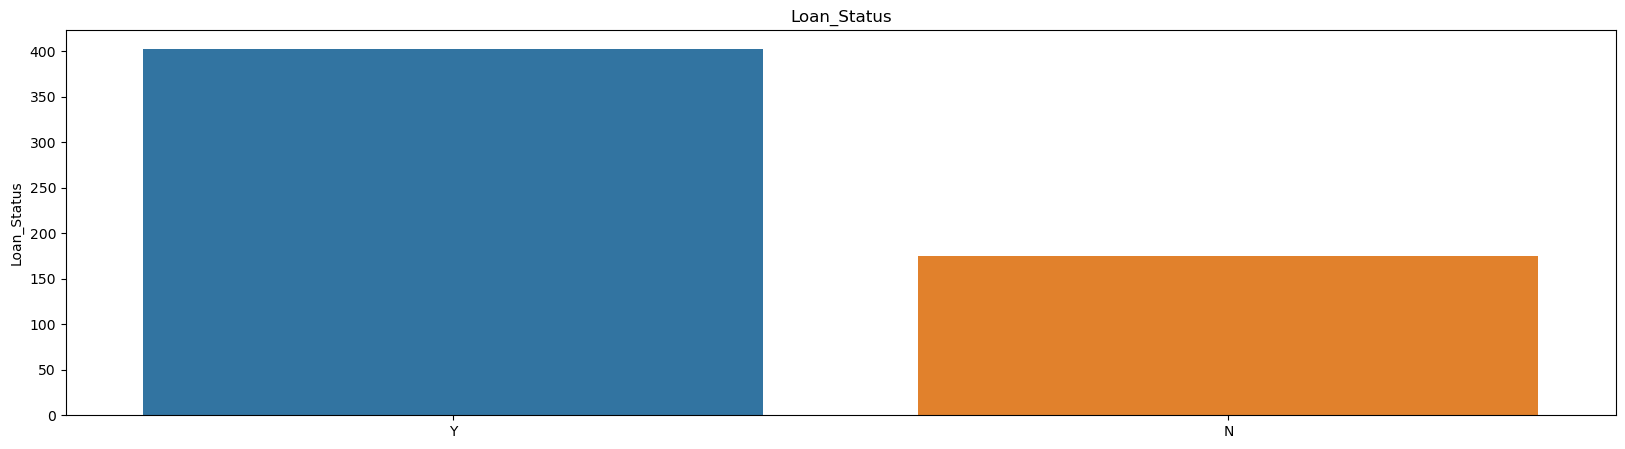

In [14]:
for i in df.columns:
    if df[i].dtype == 'object':
        plt.figure(figsize=(20,5))
        sns.barplot(data=df, x=df[i].value_counts().index, y=df[i].value_counts() )
        plt.title(i)

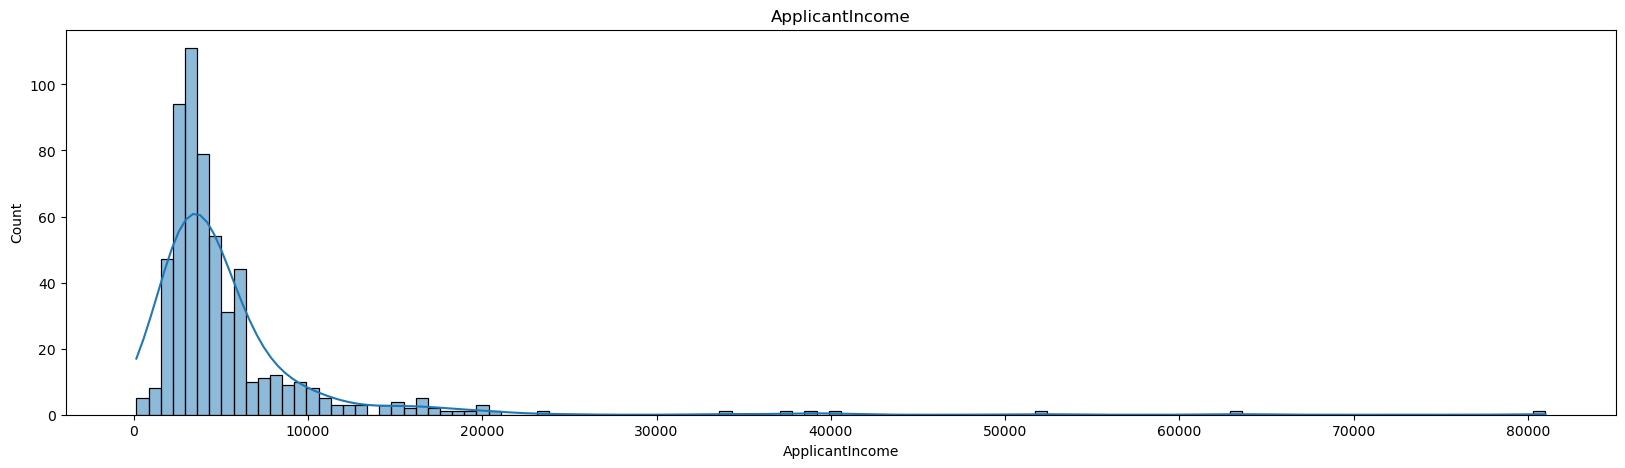

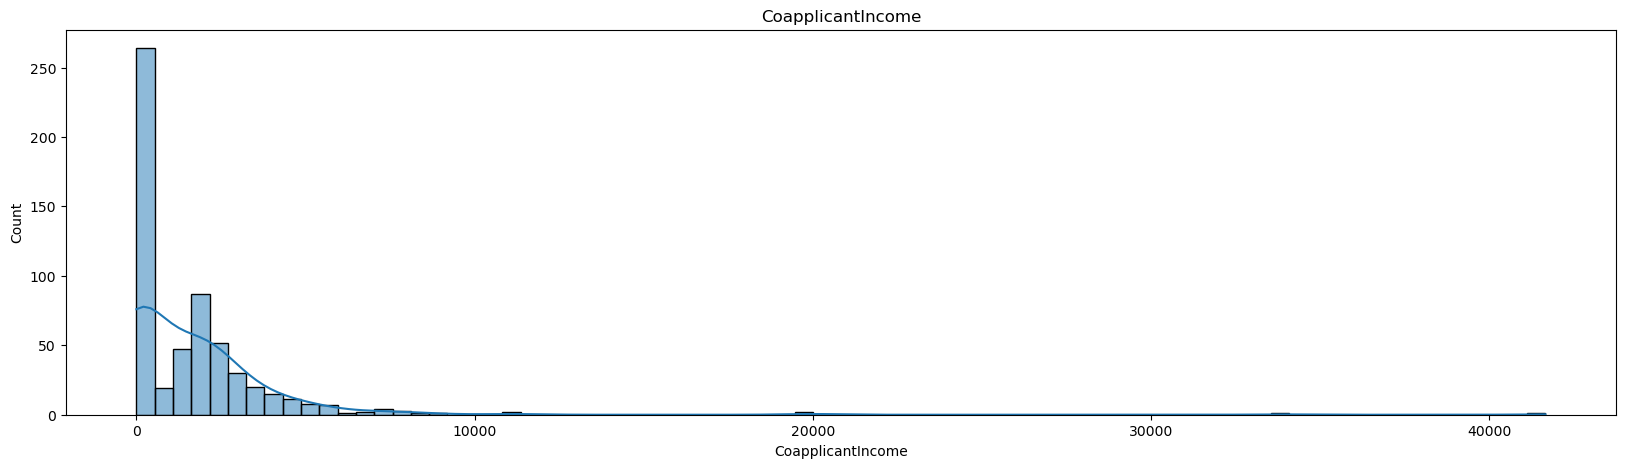

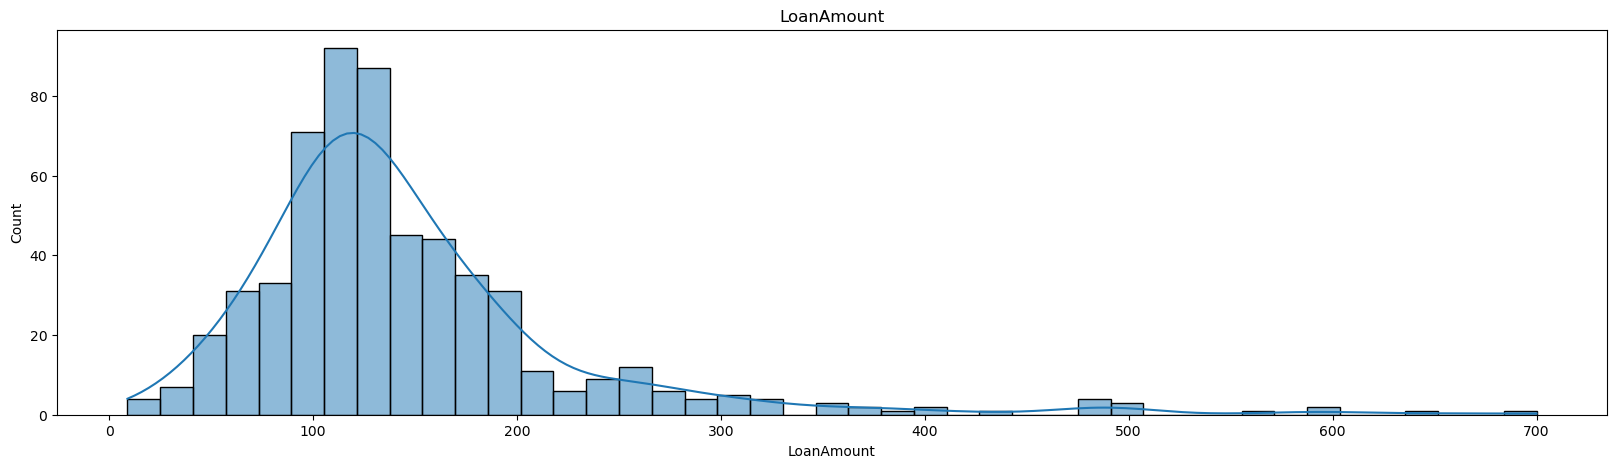

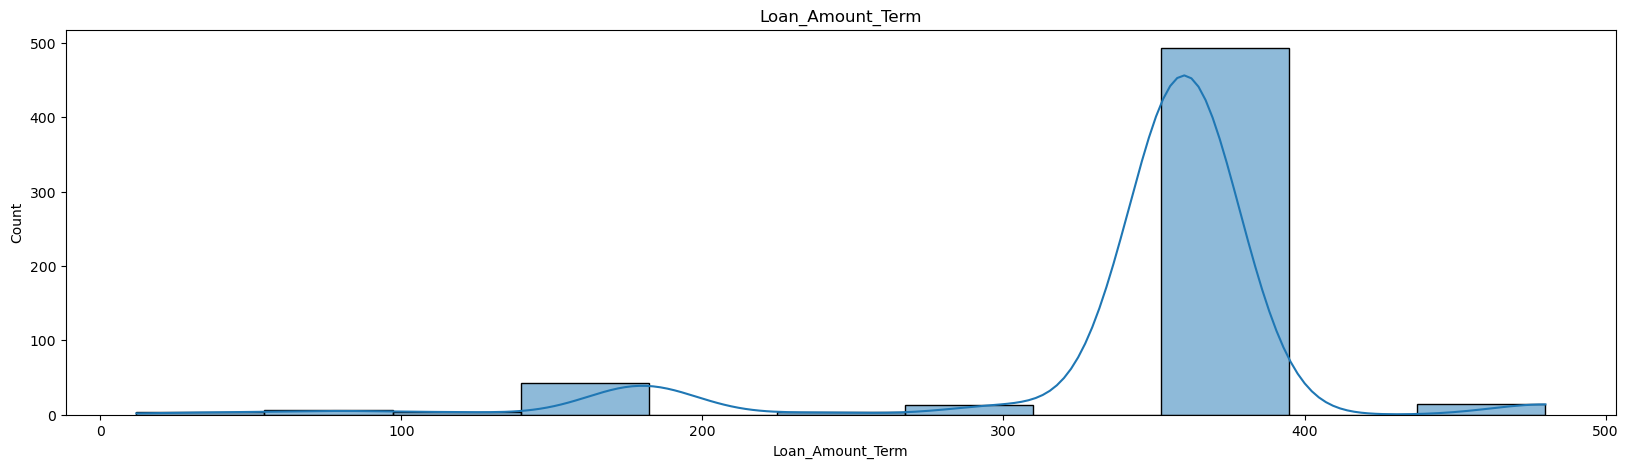

In [15]:
for i in df.columns:
    if df[i].dtype != 'object':
        plt.figure(figsize=(20,5))
        sns.histplot(df[i], kde=True)
        plt.title(i)

Text(0.5, 1.0, 'Loan Amount Term')

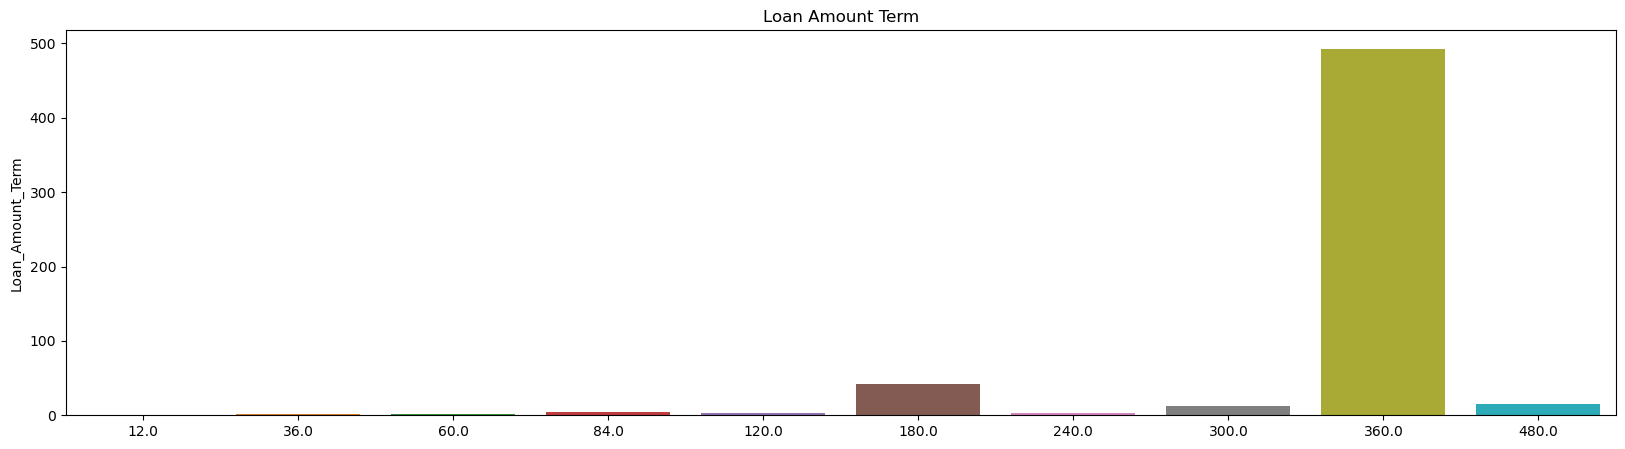

In [16]:
plt.figure(figsize=(20,5))
sns.barplot(data=df, x=df['Loan_Amount_Term'].value_counts().index, y=df['Loan_Amount_Term'].value_counts())
plt.title('Loan Amount Term')

# EDA

In [17]:
for i in df.columns[:-1]:
    if df[i].dtype == 'object':
        plt.figure(figsize=(20,5))
        px.histogram(df,
                     x=i,
                     color='Loan_Status',
                     barmode="group",
                     text_auto=".2f",
                     title = i).show();

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

## Encode Categorical Columns 

In [18]:
df1 = df.copy()

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             578 non-null    object 
 1   Married            578 non-null    object 
 2   Dependents         578 non-null    object 
 3   Education          578 non-null    object 
 4   Self_Employed      578 non-null    object 
 5   ApplicantIncome    578 non-null    int64  
 6   CoapplicantIncome  578 non-null    float64
 7   LoanAmount         578 non-null    float64
 8   Loan_Amount_Term   578 non-null    float64
 9   Credit_History     578 non-null    object 
 10  Property_Area      578 non-null    object 
 11  Loan_Status        578 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 58.7+ KB


In [20]:
cols_to_dummy = []

for i in df1.columns:
    if df1[i].dtype == 'object':
        cols_to_dummy.append(i)

cols_to_dummy

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [21]:
for col in cols_to_dummy[0:-1]:
    temp = pd.get_dummies(df1[col], drop_first=True)
    df1.drop(col,axis=1,inplace=True)
    df1 = pd.concat([df1,temp],axis=1)

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 1 to 613
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    578 non-null    int64  
 1   CoapplicantIncome  578 non-null    float64
 2   LoanAmount         578 non-null    float64
 3   Loan_Amount_Term   578 non-null    float64
 4   Loan_Status        578 non-null    object 
 5   Male               578 non-null    uint8  
 6   not_specified      578 non-null    uint8  
 7   Yes                578 non-null    uint8  
 8   not_specified      578 non-null    uint8  
 9   1                  578 non-null    uint8  
 10  2                  578 non-null    uint8  
 11  3+                 578 non-null    uint8  
 12  not_specified      578 non-null    uint8  
 13  Not Graduate       578 non-null    uint8  
 14  Yes                578 non-null    uint8  
 15  not_specified      578 non-null    uint8  
 16  1.0                578 non

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
df1['Loan_Status'] = le.fit_transform(df1['Loan_Status'])

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 1 to 613
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    578 non-null    int64  
 1   CoapplicantIncome  578 non-null    float64
 2   LoanAmount         578 non-null    float64
 3   Loan_Amount_Term   578 non-null    float64
 4   Loan_Status        578 non-null    int32  
 5   Male               578 non-null    uint8  
 6   not_specified      578 non-null    uint8  
 7   Yes                578 non-null    uint8  
 8   not_specified      578 non-null    uint8  
 9   1                  578 non-null    uint8  
 10  2                  578 non-null    uint8  
 11  3+                 578 non-null    uint8  
 12  not_specified      578 non-null    uint8  
 13  Not Graduate       578 non-null    uint8  
 14  Yes                578 non-null    uint8  
 15  not_specified      578 non-null    uint8  
 16  1.0                578 non

## Split Data

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
X = df1.drop('Loan_Status', axis=1)
y = df1['Loan_Status']

In [28]:
X.columns = X.columns.astype(str)

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Build Model

In [30]:
log_cl = LogisticRegression()
dt_cl = DecisionTreeClassifier()
rf_cl = RandomForestClassifier()
nb_cl = GaussianNB()
svm_cl = SVC(kernel='linear',random_state=0)

In [31]:
classifiers = [log_cl,nb_cl,dt_cl,rf_cl,svm_cl]

c:\Users\Marcos Verdi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression() train               precision    recall  f1-score   support

           0       0.77      0.44      0.56       141
           1       0.79      0.94      0.86       321

    accuracy                           0.79       462
   macro avg       0.78      0.69      0.71       462
weighted avg       0.78      0.79      0.77       462

LogisticRegression() test               precision    recall  f1-score   support

           0       0.75      0.53      0.62        34
           1       0.83      0.93      0.87        82

    accuracy                           0.81       116
   macro avg       0.79      0.73      0.75       116
weighted avg       0.80      0.81      0.80       116

GaussianNB() train               precision    recall  f1-score   support

           0       0.62      0.34      0.44       141
           1       0.76      0.91      0.83       321

    accuracy                           0.74       462
   macro avg       0.69      0.63      0.63       462
we

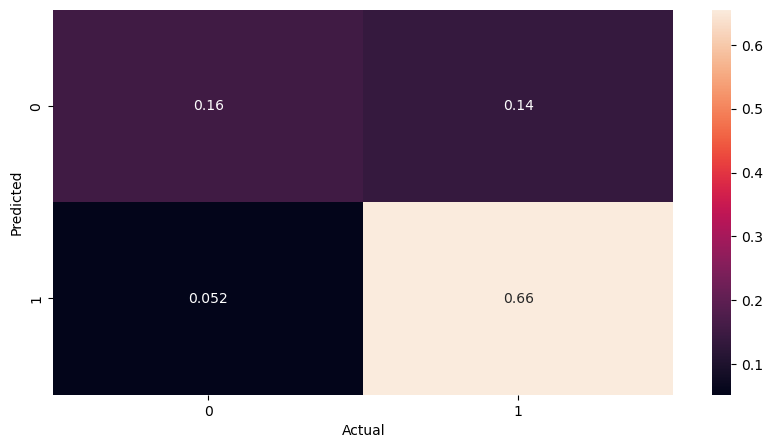

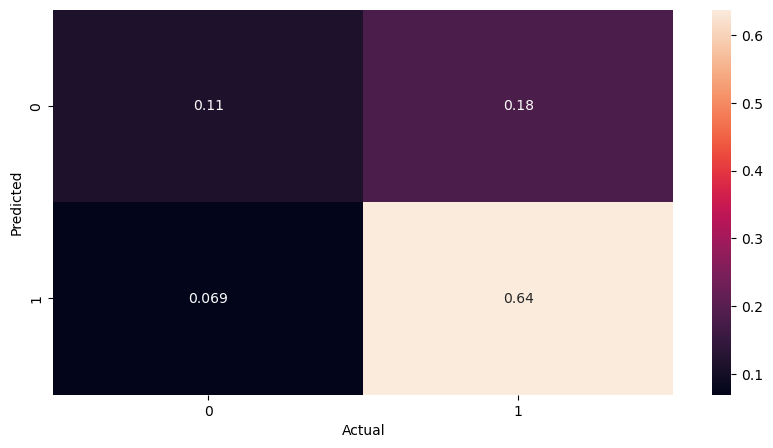

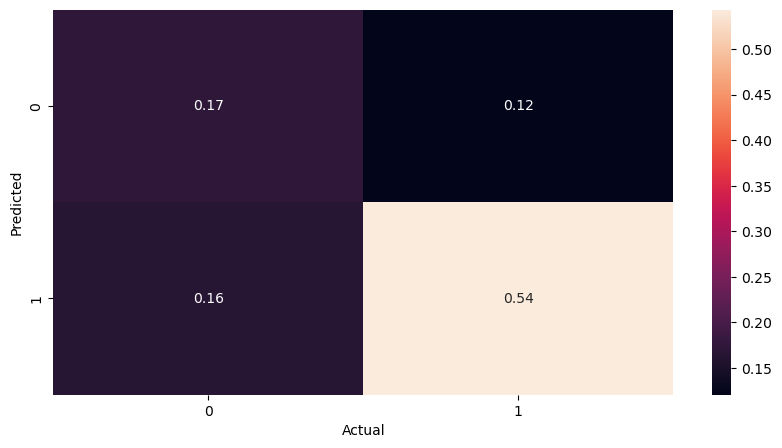

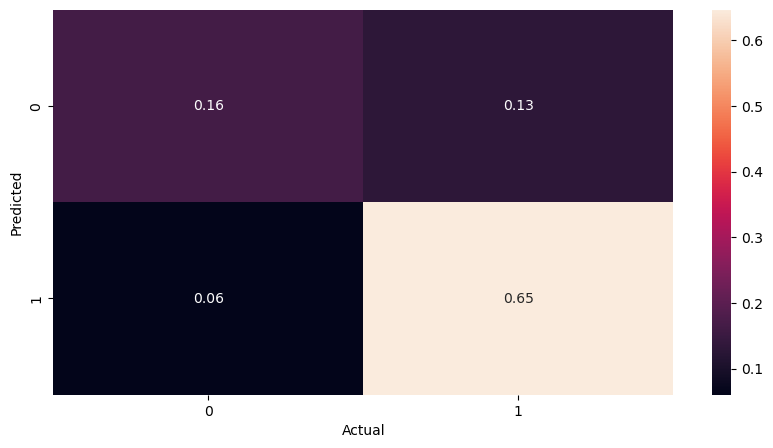

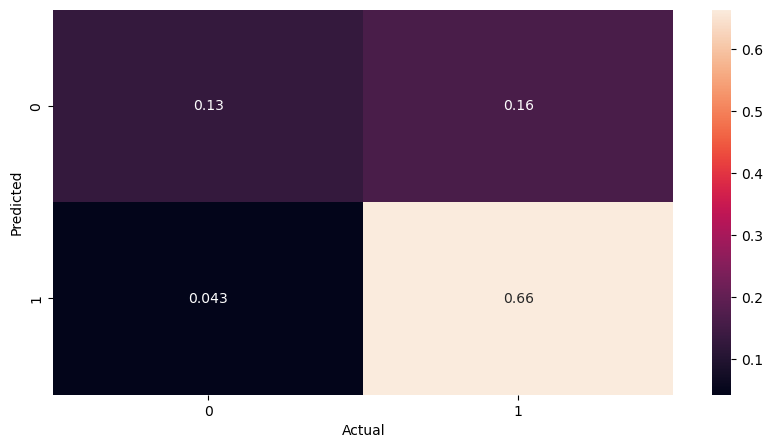

In [32]:
for c in classifiers:
    c.fit(x_train,y_train)
    pred1 = c.predict(x_train)
    pred2 = c.predict(x_test)
    cm = confusion_matrix(y_test,pred2,normalize='all')
    plt.figure(figsize=(10,5))
    sns.heatmap(cm,annot=True)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    print(c, "train", classification_report(y_train,pred1))
    print(c, "test", classification_report(y_test,pred2))

In [33]:
    classifier_labels = ['Logistic','Naive Bayes','Decision Tree','Random Forest','SVM']
    log_cl.fit(x_train,y_train)
    log_pred = log_cl.predict(x_test)
    nb_cl.fit(x_train,y_train)
    nb_pred = nb_cl.predict(x_test)
    dt_cl.fit(x_train,y_train)
    dt_pred = dt_cl.predict(x_test)
    rf_cl.fit(x_train,y_train)
    rf_pred = rf_cl.predict(x_test)
    svm_cl.fit(x_train,y_train)
    svm_pred = svm_cl.predict(x_test)
    log_score = accuracy_score(y_test,log_pred)
    nb_score = accuracy_score(y_test,nb_pred)
    dt_score = accuracy_score(y_test,dt_pred)
    rf_score = accuracy_score(y_test,rf_pred)
    svm_score = accuracy_score(y_test,svm_pred)

c:\Users\Marcos Verdi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



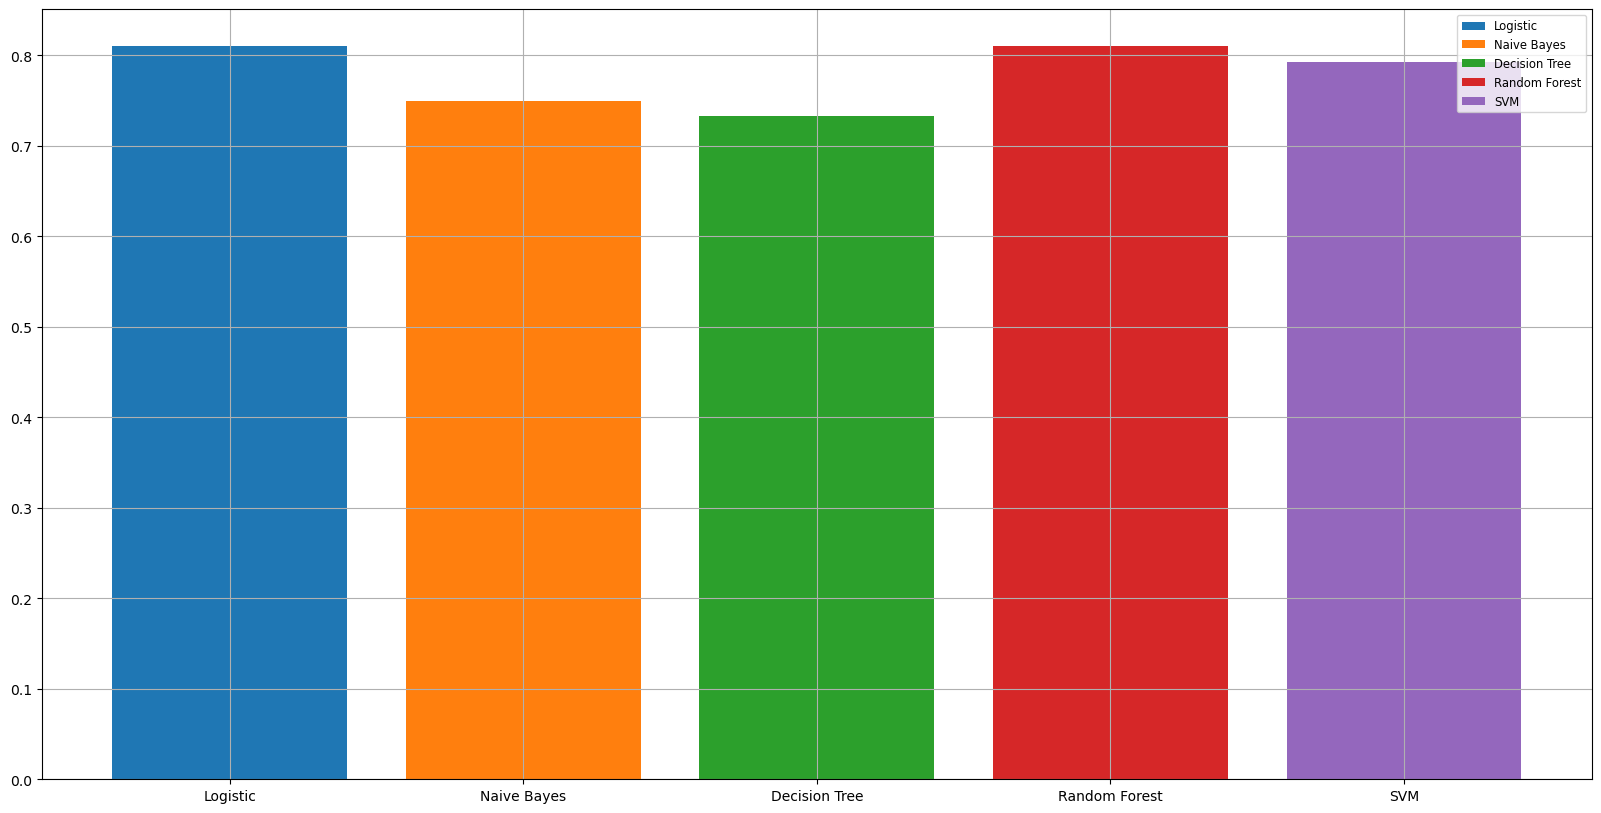

In [34]:
a = [1,2,3,4,5]
accuracy_scores = [log_score,nb_score,dt_score,rf_score,svm_score]
plt.figure(figsize=(20,10))
plt.bar(1, accuracy_scores[0], label="Logistic")
plt.bar(2, accuracy_scores[1], label="Naive Bayes")
plt.bar(3, accuracy_scores[2], label="Decision Tree")
plt.bar(4, accuracy_scores[3], label="Random Forest")
plt.bar(5, accuracy_scores[4], label="SVM")
plt.xticks(a, classifier_labels)
plt.legend(loc='upper right', fontsize='small')
plt.grid()